##   Fusion

Source of the data?

### Import from images

DICOM data converted to jpg

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# upload 2 new files: first CT image, then SPECT image
file_CT = "./CT/125.jpg" # "SPECT/SPECT_dicom-00125.dcm" #
file_SPECT = "./SPECT/SPECT_AN_img-00001-00125.jpg" # "CT/125.dcm" # 

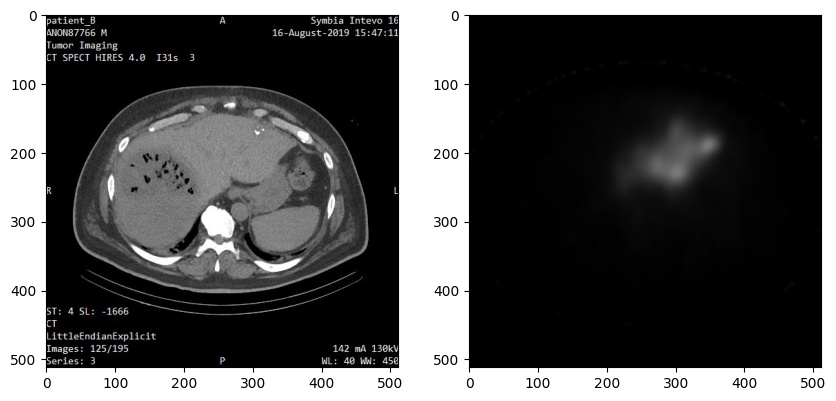

In [3]:
CT = Image.open(file_CT)
SPECT = Image.open(file_SPECT)
#plt.imshow(CT)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].imshow(CT)
axs[1].imshow(SPECT)

plt.show()

In [4]:
# допустим они одного размера
#  пусть цвет занимает только четверть диапазона яркости

fusion = CT.copy()
spec_frac = 0.5
ct_frac = 1 - spec_frac

for i in range(CT.size[0]):
    for j in range(CT.size[1]):
        ct_pix = CT.getpixel((i,j))
        sp_pix = SPECT.getpixel((i,j))
                
        # Вариант с учетом пропорций:
        #fusion.putpixel((i,j),(int(ct_pix[0]*ct_frac + sp_pix[0]*spec_frac), int(ct_pix[1]*ct_frac), int(ct_pix[2]*ct_frac)))
        # Вариант с простым сложением интенсивностей:
        fusion.putpixel((i,j),(ct_pix[0] + sp_pix[0], ct_pix[1], ct_pix[2]))
        # теперь вместо КТ записана комбинация, где красный цвет - это СПЕКТ, 
        # так как в красный канал он и добавлен.

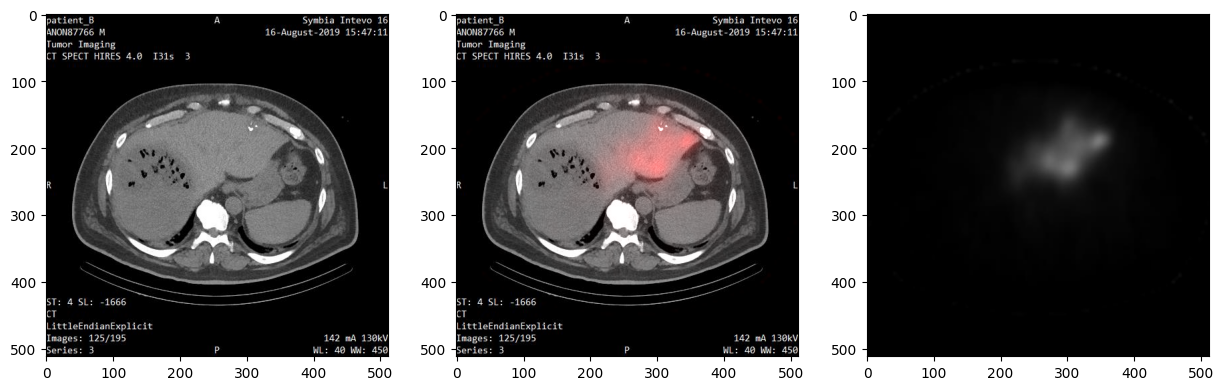

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(CT)
axs[1].imshow(fusion)
axs[2].imshow(SPECT)

plt.show()

### Import from DICOM

In [10]:
import matplotlib.pyplot as plt
import pydicom as dicom
import pylibjpeg # SPECT data here requires pip install pylibjpeg pylibjpeg-libjpeg pydicom
import numpy as np

# upload 2 new files: first CT image, then SPECT image
file_CT = "./CT/125.dcm" 
file_SPECT = "./SPECT/SPECT_dicom-00125.dcm"  

In [11]:
ct = dicom.dcmread(file_CT)
spect = dicom.dcmread(file_SPECT)

CT = ct.pixel_array
SPECT = spect.pixel_array
print(CT.shape)
print(SPECT.shape)

(512, 512)
(512, 512, 3)


(512, 512)


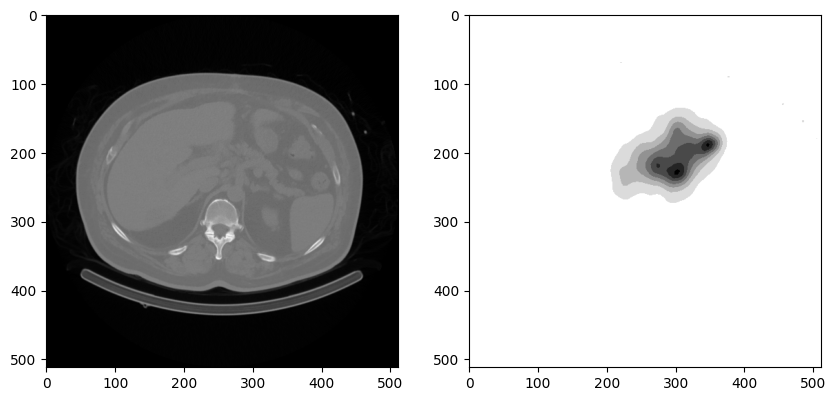

In [12]:
SPECT = SPECT[:,:,1].astype(np.uint8)
print(SPECT.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].imshow(CT, cmap='gray')
axs[1].imshow(SPECT, cmap='gray')

plt.show()

Сравним диапазоны яркости:

In [13]:
print(f'CT min/max is {np.min(CT)}/{np.max(CT)}')
print(f'SPECT min/max is {np.min(SPECT)}/{np.max(SPECT)}')

CT min/max is 0/2176
SPECT min/max is 128/135


Уберем постоянное смещение из SPECT и инвертируем интенсивность

In [14]:
SPECT_corr = np.max(SPECT) - SPECT
print(f'SPECT min/max is {np.min(SPECT)}/{np.max(SPECT)}')

SPECT min/max is 128/135


Формально при слиянии надо брать интенсивности с пропорциями, чтобы не получить переполнение данных. 

In [21]:
data = np.empty((CT.shape[0], CT.shape[1], 3), dtype=np.uint8)

spect_scale = 15

for n in range(3):
    data[:,:,n] = CT / 3

data[:,:,0] += spect_scale * SPECT_corr

теперь вместо КТ записана комбинация, где красный цвет - это СПЕКТ, так как в красный канал он и добавлен.

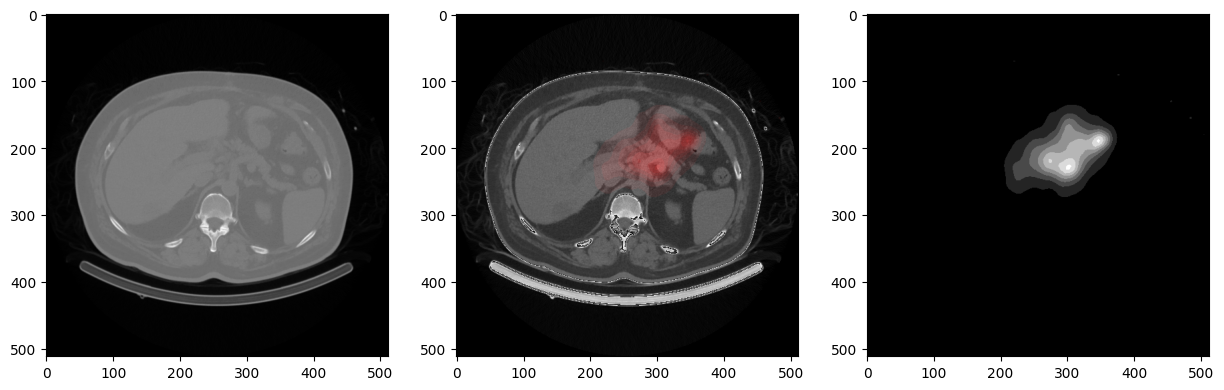

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].imshow(CT, cmap='gray')
axs[1].imshow(data) # , cmap='gray'
axs[2].imshow(SPECT_corr, cmap='gray')

plt.show()